In [1]:
import numpy as np 
import pandas as pd



In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')


In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# 1 data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop the last 3 columns because of 
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [7]:
df.sample(10)

,v1,v2
1554,ham,Yeah we do totes. When u wanna?
1469,ham,7 wonders in My WORLD 7th You 6th Ur style 5th...
3251,ham,Come to medical college at 7pm ......forward i...
742,ham,Just got up. have to be out of the room very s...
3026,ham,You still at the game?
4215,ham,Er mw im filled tuth is aight
49,ham,U don't know how stubborn I am. I didn't even ...
4780,ham,Yup... Hey then one day on fri we can ask miwa...
2759,ham,"Can meh? Thgt some will clash... Really ah, i ..."
5426,ham,Oh yeah! And my diet just flew out the window


In [8]:
# renaming 

In [9]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3160,ham,Mystery solved! Just opened my email and he's ...
614,ham,I called and said all to him:)then he have to ...
3374,ham,:)
1801,ham,I wanna watch that movie
1770,ham,Dont show yourself. How far. Put new pictures ...


In [10]:
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target']=encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [16]:
#remove duplicate

In [17]:
df=df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df.shape

(5169, 2)

# 2 .EDA

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

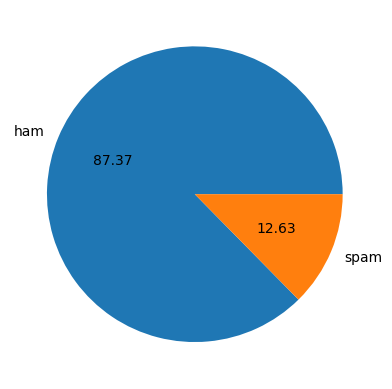

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [23]:
import nltk

In [24]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


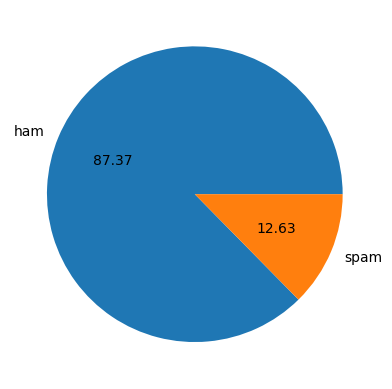

In [25]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [26]:
#data is Imbalanced

In [27]:
import nltk

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\bhush/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
df['num_characters']=df['text'].apply(len)

In [30]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
import spacy

nlp = spacy.load("en_core_web_sm")

df['num_words'] = df['text'].apply(lambda x: len(nlp(x)))


ModuleNotFoundError: No module named 'spacy'

In [37]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [38]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\bhush/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
import nltk
nltk.data.path.append("C:/Users/bhush/nltk_data")  # Adjust path if needed
nltk.download('punkt', download_dir="C:/Users/bhush/nltk_data")


[nltk_data] Downloading package punkt to C:/Users/bhush/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\bhush/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
df['num_words'] = df['text'].apply(lambda x: len(x.split()))


In [42]:
df

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,30
5568,0,Will Ì_ b going to esplanade fr home?,37,8
5569,0,"Pity, * was in mood for that. So...any other s...",57,10
5570,0,The guy did some bitching but I acted like i'd...,125,26


In [43]:
import re

df['num_sentences'] = df['text'].apply(lambda x: len(re.split(r'[.!?]+', x)) - 1)


In [44]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0


In [45]:
df[['num_characters',	'num_words'	,'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,1.846779
std,58.236293,11.068488,1.745441
min,2.000000,1.000000,0.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,3.000000
max,910.000000,171.000000,39.000000


In [46]:
#ham messages
df[df['target']==0][['num_characters',	'num_words'	,'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,1.692648
std,56.358207,11.116240,1.681598
min,2.000000,1.000000,0.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,90.000000,18.000000,2.000000
max,910.000000,171.000000,39.000000


In [47]:
#spam messages
df[df['target']==1][['num_characters',	'num_words'	,'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,2.912711
std,30.137753,5.967672,1.806610
min,13.000000,2.000000,0.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,9.000000


In [48]:
import seaborn as sns 

<Axes: xlabel='num_characters', ylabel='Count'>

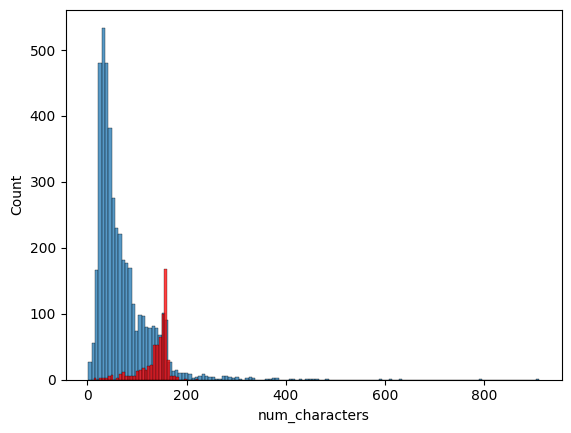

In [49]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

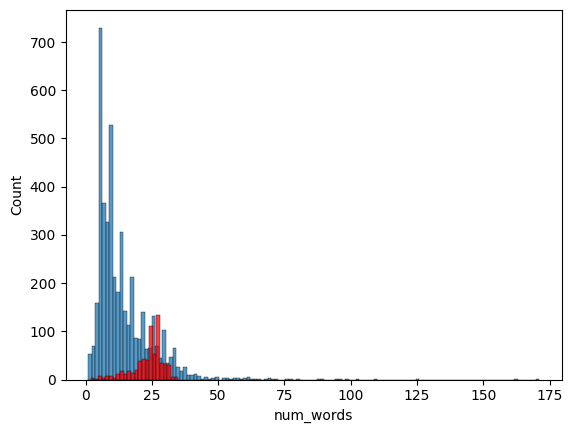

In [50]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

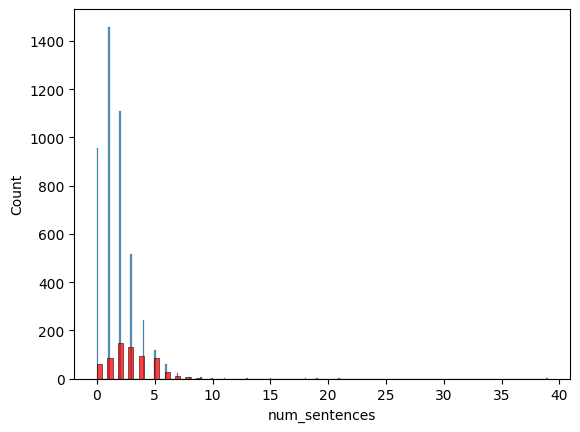

In [51]:
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

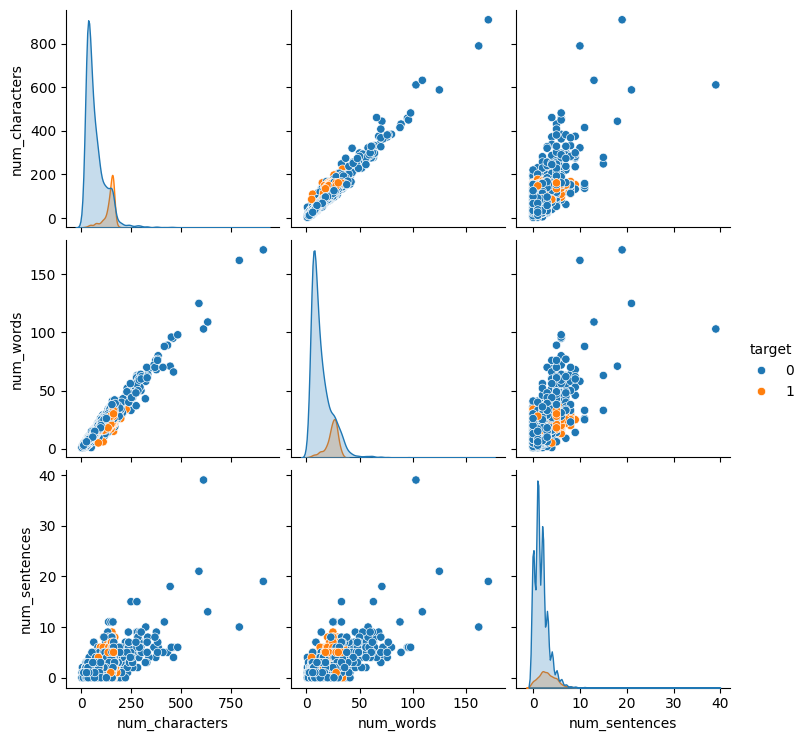

In [52]:
sns.pairplot(df,hue='target')

In [53]:
df.corr()

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

# Data Preprocessing 
### * lower case
### * tokeniztin
### * removing special characters
### * removing stop words and punctuation
### * stemming

In [54]:
import re
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer

ps = PorterStemmer()

def transform_text(text):
    # Convert to lowercase
    text = text.lower()

    # Tokenize using regex (splitting words and removing punctuation)
    text = re.findall(r'\b\w+\b', text)

    # Remove stopwords
    text = [word for word in text if word not in ENGLISH_STOP_WORDS]

    # Apply stemming
    text = [ps.stem(word) for word in text]

    return " ".join(text)

In [55]:
sample_text = "This is an example sentence, demonstrating text preprocessing!"
print(transform_text(sample_text))

exampl sentenc demonstr text preprocess


In [56]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
transform_text("'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [57]:

df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [58]:

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [59]:

df['transformed_text'] = df['text'].apply(transform_text)

In [60]:

df.head()


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,jurong point crazi avail bugi n great world la...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say earli hor u c say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0,nah don t think goe usf live


In [61]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [62]:
#ham spam worldcloud important words ko highlight krta hain

In [64]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [65]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=""))

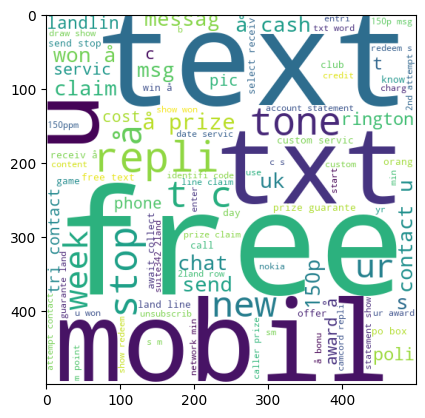

In [66]:
plt.imshow(spam_wc)

In [67]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=""))

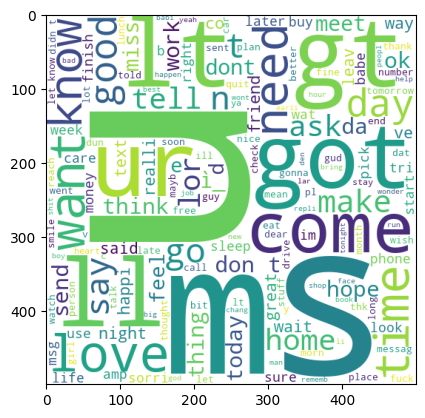

In [68]:
plt.imshow(ham_wc)

In [69]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,jurong point crazi avail bugi n great world la...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say earli hor u c say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0,nah don t think goe usf live


In [70]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [71]:
(spam_corpus)

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 '2005',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 't',
 'c',
 's',
 'appli',
 '08452810075over18',
 's',
 'freemsg',
 'hey',
 'darl',
 's',
 '3',
 'week',
 's',
 'word',
 'd',
 'like',
 'fun',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'å',
 '1',
 '50',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'å',
 '900',
 'prize',
 'reward',
 'claim',
 '09061701461',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'mobil',
 'updat',
 'free',
 '08002986030',
 'chanc',
 'win',
 'cash',
 '100',
 '20',
 '000',
 'pound',
 'txt',
 'csh11',
 'send',
 '87575',
 'cost',
 '150p',
 'day',
 '6day',
 '16',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 'won',
 '1',
 'week',
 'free',
 'membership',
 'å',

In [72]:
len(spam_corpus)

11402

In [73]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('å', 247),
 ('free', 195),
 ('2', 184),
 ('u', 147),
 ('txt', 145),
 ('text', 128),
 ('ur', 119),
 ('mobil', 118),
 ('4', 114),
 ('stop', 109),
 ('repli', 103),
 ('claim', 98),
 ('1', 93),
 ('prize', 83),
 ('www', 83),
 ('t', 76),
 ('s', 75),
 ('min', 71),
 ('tone', 70),
 ('just', 67),
 ('cash', 65),
 ('servic', 65),
 ('150p', 64),
 ('new', 64),
 ('uk', 63),
 ('send', 61),
 ('won', 61),
 ('nokia', 59),
 ('urgent', 58),
 ('msg', 58)]

In [74]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,å,247
1,free,195
2,2,184
3,u,147
4,txt,145
5,text,128
6,ur,119
7,mobil,118
8,4,114
9,stop,109


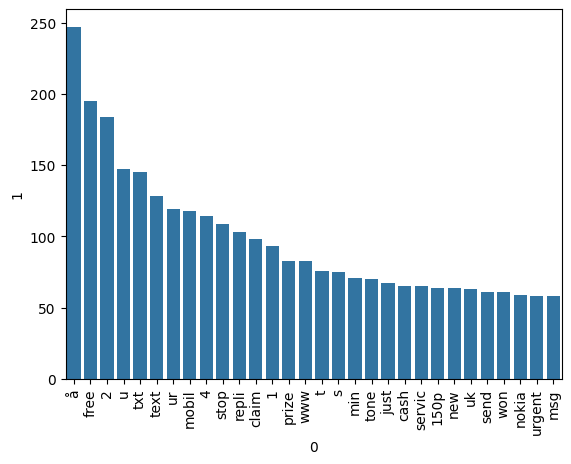

In [75]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], 
           y= pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


In [76]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [77]:
len(ham_corpus)

34958

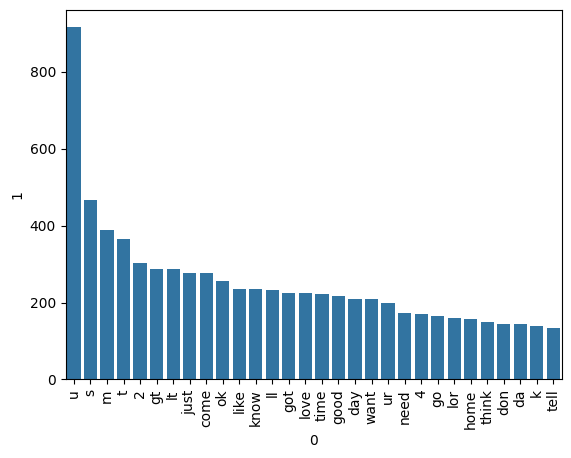

In [78]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], 
           y= pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


In [79]:
#naives bayes model

# 4 MODEL BUILDING

## text ko vector mein cnvert krna pdega means text ko vectors mein convert krna odega 

1 } bag of words
2 } tfidf
3} word to vec

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [81]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [82]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [83]:
X.shape

(5169, 7115)

In [84]:
y=df['target'].values

In [85]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [88]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix ,precision_score

In [89]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [90]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.879110251450677
[[785 111]
 [ 14 124]]
0.5276595744680851


In [91]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.97678916827853
[[881  15]
 [  9 129]]
0.8958333333333334


In [92]:
bnb.fit(X_train,y_train)
y_pred3=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.879110251450677
[[785 111]
 [ 14 124]]
0.5276595744680851


# by using tfif vectorizatioN


In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [94]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [95]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [96]:
X.shape

(5169, 7115)

In [97]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X=scaler.fit_transform(X)

In [98]:
y=df['target'].values

In [99]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [102]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

In [103]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [104]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[785 111]
 [ 19 119]]
0.5173913043478261


In [105]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.965183752417795
[[896   0]
 [ 36 102]]
1.0


In [106]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9777562862669246
[[894   2]
 [ 21 117]]
0.9831932773109243


# tfidf ----->>> mnb

In [238]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [239]:

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [107]:

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

NameError: name 'svc' is not defined

In [241]:

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [242]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9748549323017408, 0.9745762711864406)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  KN
Accuracy -  0.8965183752417795
Precision -  1.0
For  NB
Accuracy -  0.965183752417795
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.9024390243902439
For  LR
Accuracy -  0.9526112185686654
Precision -  0.9405940594059405
For  RF
Accuracy -  0.971953578336557
Precision -  0.990990990990991
For  AdaBoost
Accuracy -  0.8994197292069632
Precision -  0.9047619047619048


In [108]:
import pandas as pd
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

NameError: name 'clfs' is not defined

In [109]:
performance_df

NameError: name 'performance_df' is not defined

In [110]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

NameError: name 'performance_df' is not defined

In [111]:
performance_df1

NameError: name 'performance_df1' is not defined

In [112]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

NameError: name 'performance_df1' is not defined

In [113]:
#MODEL IMPROVE 

In [114]:
#CHANGE THE max_features parametres to tfidf

In [115]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

NameError: name 'clfs' is not defined

In [116]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

NameError: name 'clfs' is not defined

In [117]:
new_df = performance_df.merge(temp_df,on='Algorithm')

NameError: name 'performance_df' is not defined

In [118]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

NameError: name 'new_df' is not defined

In [119]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

NameError: name 'clfs' is not defined

In [120]:
new_df_scaled.merge(temp_df,on='Algorithm')

NameError: name 'new_df_scaled' is not defined

In [121]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifie

NameError: name 'SVC' is not defined

In [122]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

NameError: name 'VotingClassifier' is not defined

In [123]:
voting.fit(X_train,y_train)

NameError: name 'voting' is not defined

In [124]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

NameError: name 'voting' is not defined

In [125]:

# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

NameError: name 'svc' is not defined

In [126]:
from sklearn.ensemble import StackingClassifier

In [127]:

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

NameError: name 'estimators' is not defined

In [128]:

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

NameError: name 'clf' is not defined

In [129]:

import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))